## Variance between Infomap Runs

In this notebook, we check the robustness of our results against the randomness inherent in the `infomap` algorithm
as reported in the SI.

In short, we investigate the question:
How much variance does there exist between infomap runs with different seeds?

### Preparations

In [1]:
import pandas as pd
import matplotlib.pylab as plt
import matplotlib.colors as colors
import seaborn as sns

In [2]:
years = list(range(1998, 2019 + 1))

#### US

In [3]:
df = pd.read_pickle('../results/variance_infomap_runs_us_reg.pickle')
df.describe()

Method          NMI                                                      \
index          1998         1999         2000         2001         2002   
count   4950.000000  4950.000000  4950.000000  4950.000000  4950.000000   
mean       0.902915     0.897168     0.887954     0.899674     0.901369   
std        0.012541     0.011800     0.013168     0.011379     0.010419   
min        0.854216     0.854874     0.845936     0.863094     0.864323   
25%        0.894319     0.888953     0.879196     0.892148     0.894281   
50%        0.903319     0.897599     0.888049     0.899699     0.901250   
75%        0.911680     0.905098     0.896630     0.907194     0.908388   
max        0.942773     0.937878     0.934665     0.940414     0.934938   

Method                                                                   ...  \
index          2003         2004         2005         2006         2007  ...   
count   4950.000000  4950.000000  4950.000000  4950.000000  4950.000000  ...   
mean       0.897250     0.896042     0.900438     0.901626     0.899254  ...   
std        0.010666     0.011474     0.012159     0.011252     0.011336  ...   
min        0.864528     0.856493     0.854607     0.862832     0.859921  ...   
25%        0.889992     0.888022     0.892078     0.893807     0.891364  ...   
50%        0.897225     0.896091     0.900505     0.901471     0.899144  ...   
75%        0.904516     0.904150     0.908967     0.909487     0.906884  ...   
max        0.940160     0.933363     0.942366     0.939569     0.938536  ...   

Method         Rand                                                      \
index          2010         2011         2012         2013         2014   
count   4950.000000  4950.000000  4950.000000  4950.000000  4950.000000   
mean       0.734030     0.780450     0.769510     0.782452     0.774363   
std        0.039079     0.035916     0.036041     0.037737     0.036124   
min        0.612807     0.664024     0.662470     0.668828     0.664708   
25%        0.706181     0.755726     0.743960     0.755416     0.748998   
50%        0.731529     0.780689     0.768259     0.782537     0.773856   
75%        0.759716     0.805778     0.793633     0.809034     0.799430   
max        0.868788     0.887949     0.885090     0.893300     0.897230   

Method                                                                   
index          2015         2016         2017         2018         2019  
count   4950.000000  4950.000000  4950.000000  4950.000000  4950.000000  
mean       0.776367     0.749321     0.759759     0.760439     0.773291  
std        0.034357     0.037288     0.033162     0.032558     0.030751  
min        0.656617     0.643069     0.650185     0.635653     0.654482  
25%        0.752199     0.721977     0.736656     0.737662     0.751751  
50%        0.775676     0.747381     0.759520     0.759661     0.772236  
75%        0.801011     0.775252     0.782397     0.782815     0.794154  
max        0.878220     0.879420     0.882402     0.861613     0.873728  

[8 rows x 44 columns]

In [4]:
cm = plt.get_cmap('viridis')
cNorm  = colors.Normalize(vmin=0, vmax=len(years)-1)
plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams['font.size'] = 20
sns.set_style('whitegrid')

In [5]:
def create_variance_plot(df_col, xlabel, save_path=None):
    for idx, (year, col) in enumerate(df_col.iteritems()):
        sns.distplot(col, norm_hist=True, hist=False, rug=False, color=cm(idx/25), label=year)
        #col.hist(bins=25, histtype='step', label=year, density=True, color=cm(idx/25))
    plt.legend(ncol=2, loc='upper left', bbox_to_anchor=(0,1), fontsize=16)
    plt.xlim(0.49,1.0)
    plt.ylim(0,50)
    plt.xlabel(xlabel)
    plt.ylabel('Smoothed Frequency among\n4950 Pairs of Clusterings')
    plt.tight_layout()
    if save_path is not None:
        plt.savefig(save_path)

/Users/janisbeckedorf/PycharmProjects/regulatory-state/venv/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/janisbeckedorf/PycharmProjects/regulatory-state/venv/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/janisbeckedorf/PycharmProjects/regulatory-state/venv/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be 

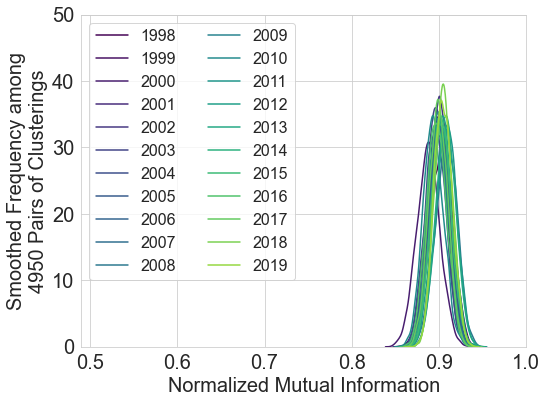

In [6]:
create_variance_plot(df['NMI'], 'Normalized Mutual Information', save_path='../graphics/variance_infomap_runs_us_reg_nmi.pdf')

/Users/janisbeckedorf/PycharmProjects/regulatory-state/venv/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/janisbeckedorf/PycharmProjects/regulatory-state/venv/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/janisbeckedorf/PycharmProjects/regulatory-state/venv/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be 

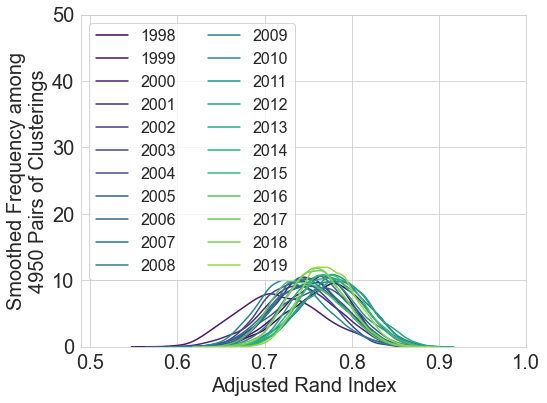

In [7]:
create_variance_plot(df['Rand'], 'Adjusted Rand Index', save_path='../graphics/variance_infomap_runs_us_reg_rand.pdf')

#### DE

In [8]:
df = pd.read_pickle('../results/variance_infomap_runs_de_reg.pickle')
df.describe()

Method          NMI                                                      \
index          1998         1999         2000         2001         2002   
count   4950.000000  4950.000000  4950.000000  4950.000000  4950.000000   
mean       0.917972     0.916040     0.914396     0.919365     0.922827   
std        0.009182     0.009652     0.009610     0.009566     0.009811   
min        0.879597     0.879754     0.879793     0.885993     0.887852   
25%        0.911682     0.909571     0.907843     0.912716     0.916053   
50%        0.917945     0.916155     0.914358     0.919339     0.922822   
75%        0.924051     0.922697     0.920805     0.926031     0.929724   
max        0.950229     0.946403     0.945244     0.949202     0.961551   

Method                                                                   ...  \
index          2003         2004         2005         2006         2007  ...   
count   4950.000000  4950.000000  4950.000000  4950.000000  4950.000000  ...   
mean       0.920511     0.912859     0.912735     0.914761     0.915481  ...   
std        0.009883     0.010002     0.010384     0.010121     0.010318  ...   
min        0.889263     0.871059     0.879305     0.879531     0.882893  ...   
25%        0.913891     0.906299     0.905540     0.907835     0.908459  ...   
50%        0.920656     0.912918     0.912829     0.914840     0.915461  ...   
75%        0.927471     0.919688     0.919749     0.921708     0.922518  ...   
max        0.954959     0.946074     0.946830     0.952690     0.950645  ...   

Method         Rand                                                      \
index          2010         2011         2012         2013         2014   
count   4950.000000  4950.000000  4950.000000  4950.000000  4950.000000   
mean       0.871767     0.875073     0.873485     0.864837     0.866891   
std        0.022820     0.022175     0.022325     0.022600     0.021517   
min        0.804209     0.800142     0.796486     0.784134     0.795836   
25%        0.855923     0.860057     0.858149     0.849256     0.851915   
50%        0.871677     0.874982     0.874084     0.865011     0.866732   
75%        0.887773     0.890879     0.889097     0.880536     0.881680   
max        0.940179     0.937224     0.943040     0.943253     0.941689   

Method                                                                   
index          2015         2016         2017         2018         2019  
count   4950.000000  4950.000000  4950.000000  4950.000000  4950.000000  
mean       0.864806     0.870085     0.869780     0.871899     0.870817  
std        0.023183     0.022198     0.023217     0.021358     0.021365  
min        0.786765     0.788579     0.789055     0.798933     0.793338  
25%        0.848319     0.854650     0.854220     0.857438     0.856436  
50%        0.864655     0.870082     0.870069     0.871982     0.870629  
75%        0.881166     0.885775     0.885660     0.886861     0.885824  
max        0.940425     0.937148     0.939714     0.940262     0.934137  

[8 rows x 44 columns]

/Users/janisbeckedorf/PycharmProjects/regulatory-state/venv/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/janisbeckedorf/PycharmProjects/regulatory-state/venv/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/janisbeckedorf/PycharmProjects/regulatory-state/venv/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be 

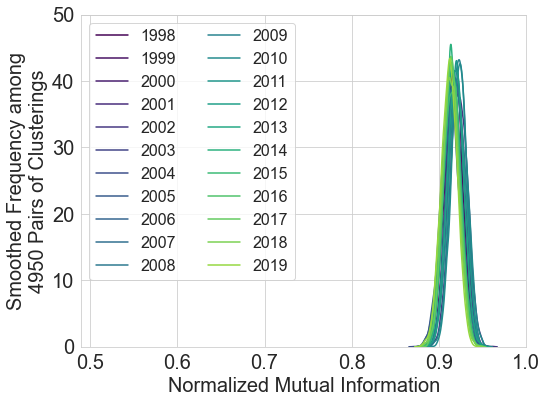

In [9]:
create_variance_plot(df['NMI'], 'Normalized Mutual Information', save_path='../graphics/variance_infomap_runs_de_reg_nmi.pdf')

/Users/janisbeckedorf/PycharmProjects/regulatory-state/venv/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/janisbeckedorf/PycharmProjects/regulatory-state/venv/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/janisbeckedorf/PycharmProjects/regulatory-state/venv/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be 

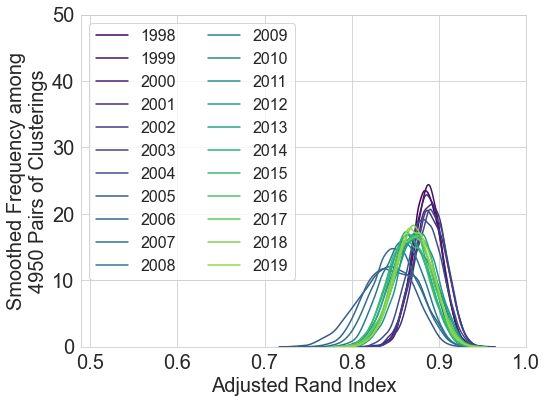

In [10]:
create_variance_plot(df['Rand'], 'Adjusted Rand Index', save_path='../graphics/variance_infomap_runs_de_reg_rand.pdf')